In [ ]:
import torch
import torch.nn as nn

# 1. Create a simple linear model.

class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        # TODO: Add a linear layer.
        # Hint: Use nn.Linear(input_size, output_size)
        # Choices for input_size: 10, 20, 30
        # Choices for output_size: 1, 5, 10


    def forward(self, x):
        # TODO: Pass the input through the linear layer.
        # Hint: Use self.linear(x)
        return "<YOUR_OUTPUT>"
# Test conditions:
def test_linear_model():
  model = LinearModel(10, 1) # Example parameters for testing
  input_data = torch.randn(1, 10) # Adjust dimensions as needed
  output = model(input_data)

  assert isinstance(model.linear, nn.Linear), "Linear layer not correctly defined."
  assert output.shape == torch.Size([1, 1]), "Output shape is incorrect"
  # Add further assertion about the parameters of the linear layer if needed.

test_linear_model()
print("Tests passed successfully! ✅")

Tests passed successfully! ✅


In [ ]:
# 2. Create a model with a hidden layer.

class HiddenLayerModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(HiddenLayerModel, self).__init__()
        # TODO: Add two linear layers:
        #   - one from input_size to hidden_size
        #   - another from hidden_size to output_size
        # Choices for input_size: 10, 20, 30
        # Choices for hidden_size: 5, 10, 15
        # Choices for output_size: 1, 5, 10



        # TODO: Add a ReLU activation function
        # Hint: Use nn.ReLU()

    def forward(self, x):
        # TODO: Pass input through the first linear layer, then ReLU, then the second linear layer.
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# Test conditions:
def test_hidden_layer_model():
  model = HiddenLayerModel(20, 5, 1) # Example parameters for testing
  input_data = torch.randn(1, 20)
  output = model(input_data)

  assert isinstance(model.fc1, nn.Linear), "First linear layer not correctly defined."
  assert isinstance(model.fc2, nn.Linear), "Second linear layer not correctly defined."
  assert isinstance(model.relu, nn.ReLU), "ReLU activation not correctly defined."
  assert output.shape == torch.Size([1, 1]), "Output shape is incorrect"
  # Add further assertion about the parameters of the linear layers if needed.


# Run the tests
test_hidden_layer_model()

print("Tests passed successfully!")

## Okay! Time to build a Neural Network!

In [ ]:
import torch
import torch.nn as nn

## Step 1 -  Design the Model Architecture

In [ ]:
class myNeuralNetwork(nn.Module):
    def __init__(self,input_size, hidden_layer_size,output_size,activation):
        super(myNeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_layer_size)
        self.layer2 = nn.Linear(hidden_layer_size, hidden_layer_size)
        self.layer3 = nn.Linear(hidden_layer_size, output_size)
        self.activation = activation
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x

Every model in PyTorch *must* inherit from the `nn.Module` class.

- Now, every model needs data!. Fortunately for us PyTorch provides us with sample datasets

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 2670829.21it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1133550.06it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9694459.10it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2313361.11it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
# Define a training function and test function
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    live_loss = 0
    for batch, (X, y) in enumerate(dataloader):

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        live_loss = loss.item()*X.size(0)
    return live_loss/size

In [ ]:
# Define a testing function
def test(dataloader, model, loss_fn):
  model.eval()
  correct = 0
  Total = 0
  testLoss = 0.0
  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      testLoss += loss_fn(pred, y).item()
      _, predicted = torch.max(pred.data, 1)
      Total += y.size(0)
      correct += (predicted == y).sum().item()
  return testLoss/len(dataloader), correct/Total


In [ ]:
# Hyperparameters
input_size = 784
hidden_size = 128
num_classes = 10
num_epochs = 10
learning_rate = 0.001

# Activation functions
activation_functions = {
    'ReLU': nn.ReLU(),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh(),
    'LeakyReLU': nn.LeakyReLU()
}

results = {}

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Train and test the model with different activation functions
for name, activation_function in activation_functions.items():
    print(f"Training with {name} activation function...")

    model = myNeuralNetwork(input_size, hidden_size, num_classes, activation_function).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    train_loss_history = []
    test_loss_history = []
    test_accuracy_history = []

    for epoch in range(num_epochs):
        train_loss = train(train_loader, model, criterion, optimizer)
        test_loss, test_accuracy = test(test_loader, model, criterion)

        train_loss_history.append(train_loss)
        test_loss_history.append(test_loss)
        test_accuracy_history.append(test_accuracy)

        print(f"Epoch [{epoch + 1}/{num_epochs}], Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    results[name] = {
        'train_loss_history': train_loss_history,
        'test_loss_history': test_loss_history,
        'test_accuracy_history': test_accuracy_history
    }

Training with ReLU activation function...
Epoch [1/10], Test Loss: 0.2169, Test Accuracy: 0.94%
Epoch [2/10], Test Loss: 0.1550, Test Accuracy: 0.96%
Epoch [3/10], Test Loss: 0.1283, Test Accuracy: 0.96%
Epoch [4/10], Test Loss: 0.1023, Test Accuracy: 0.97%
Epoch [5/10], Test Loss: 0.0920, Test Accuracy: 0.97%
Epoch [6/10], Test Loss: 0.0849, Test Accuracy: 0.97%
Epoch [7/10], Test Loss: 0.0774, Test Accuracy: 0.98%
Epoch [8/10], Test Loss: 0.0783, Test Accuracy: 0.98%
Epoch [9/10], Test Loss: 0.0723, Test Accuracy: 0.98%
Epoch [10/10], Test Loss: 0.0733, Test Accuracy: 0.98%
Training with Sigmoid activation function...
Epoch [1/10], Test Loss: 0.2747, Test Accuracy: 0.92%
Epoch [2/10], Test Loss: 0.2104, Test Accuracy: 0.94%
Epoch [3/10], Test Loss: 0.1663, Test Accuracy: 0.95%
Epoch [4/10], Test Loss: 0.1417, Test Accuracy: 0.96%
Epoch [5/10], Test Loss: 0.1275, Test Accuracy: 0.96%
Epoch [6/10], Test Loss: 0.1121, Test Accuracy: 0.97%
Epoch [7/10], Test Loss: 0.1023, Test Accuracy: 

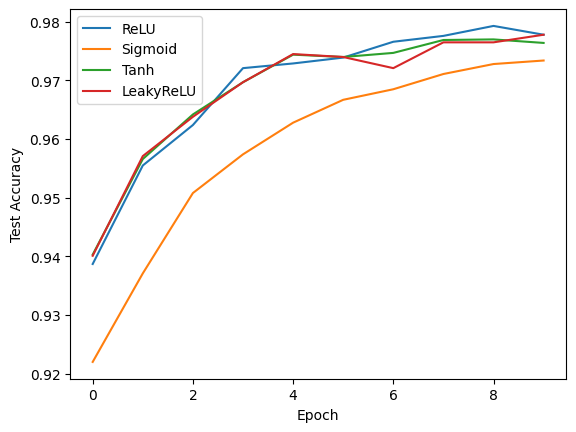

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
for name, result in results.items():
    plt.plot(result['test_accuracy_history'], label=name)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()